# Import libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

# EDA (Exploratory Data Analysis)

It appears that you are describing a statistical analysis related to house features and their relationship with house prices in four cities in Saudi Arabia: Riyadh, Jeddah, Dammam, and Al-Khobar.

The main goal of the statistical analysis is to understand how various features of houses are related to predicting their prices.

The dataset used for this analysis is specifically focused on rental houses. This means the analysis will consider data related to houses that are available for rent.

## Data Overview

### Load Data 

In [2]:
data = pd.read_csv("Data/SA_Aqar.csv")

### Shape

In [3]:
data.shape

(3718, 24)

### Insights and Information: A Comprehensive Overview

In [4]:
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [6]:
data.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


### Univariate Visualization: Understanding Single Variables

#### City 

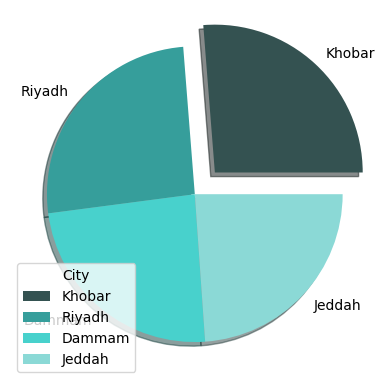

In [7]:
cityvalues = data['city'].value_counts()
cityLabel= ['Khobar', "Riyadh", "Dammam", "Jeddah"]
mycolors = ["#345251", "#369E9B", "#48D1CC", "#8BD9D6"]
myexplode = [0.2, 0, 0, 0]
plt.pie(cityvalues, labels = cityLabel, explode = myexplode, shadow = True, colors = mycolors)
plt.legend(title = 'City')
plt.show()

**The analysis focuses on four specific cities in Saudi Arabia**

**Riyadh**: The capital and largest city with a diverse population and continuous growth.

**Jeddah**: An economic and tourism hub located on the Red Sea coast.

**Dammam**: Located on the Persian Gulf and part of a larger industrial complex with other cities.

**Al-Khobar**: An industrial city in the Eastern Province known for various manufacturing activities.

#### Front 

/tmp/ipykernel_50678/365768163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='front', order=front, palette=custom_palette)


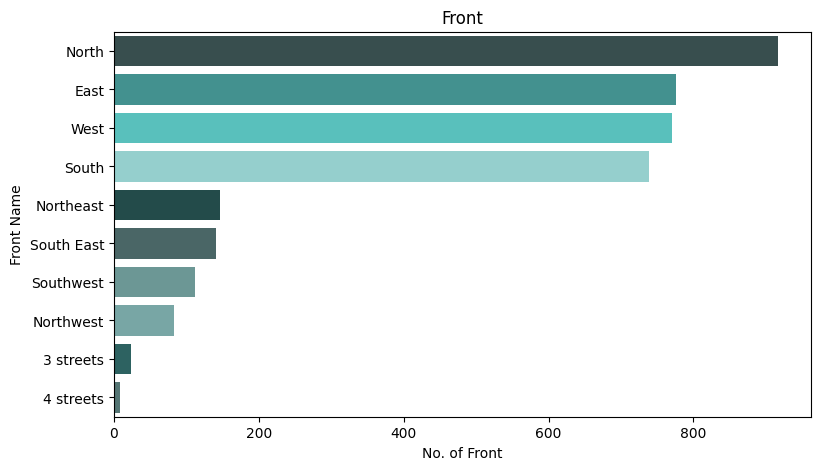

In [8]:
front = data['front'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
custom_palette = ['#345251', '#369E9B', '#48D1CC', '#8BD9D6', '#1C5250', '#456B6A', '#659E9C', '#70AEAC', '#246B69', '#4E7A79']
sns.countplot(data=data, y='front', order=front, palette=custom_palette)
plt.title('Front')
plt.xlabel('No. of Front')
plt.ylabel('Front Name');
custom_labels = ['North', 'East', 'West', 'South', 'Northeast', 'South East', 'Southwest', 'Northwest', '3 streets', '4 streets']
plt.yticks(range(len(custom_labels)), custom_labels)
plt.show()

#### Size

<Axes: xlabel='size', ylabel='Density'>

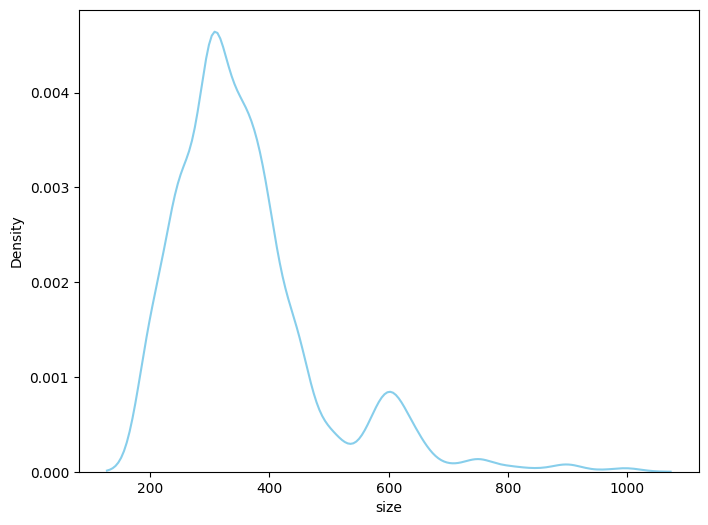

In [9]:
filtered_data = data[(data['size'] >= 200) & (data['size'] <= 1000)]
plt.figure(figsize=(8, 6))
sns.kdeplot(data=filtered_data['size'], color='skyblue')

<Axes: xlabel='size'>

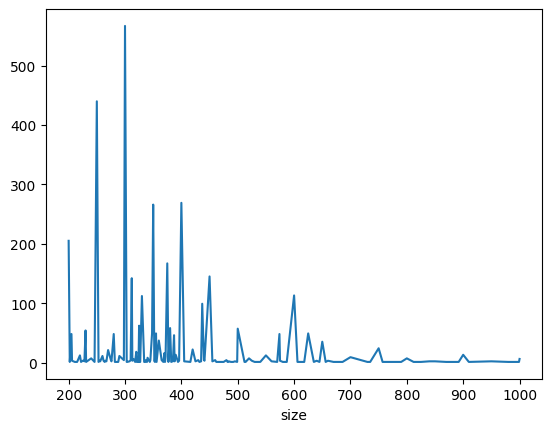

In [10]:
filtered_data['size'].value_counts().sort_index().plot.line()

#### Property Age

<Axes: xlabel='property_age'>

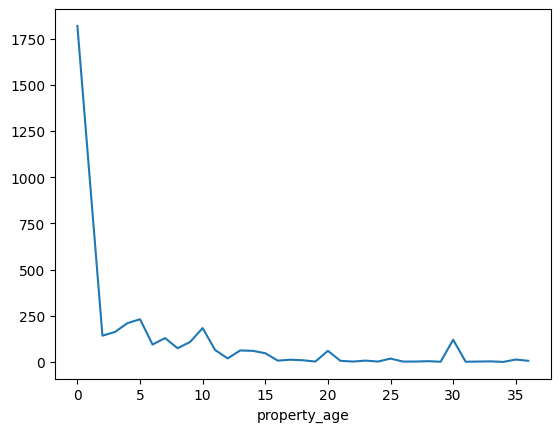

In [11]:
data['property_age'].value_counts().sort_index().plot.line()

#### Bedrooms

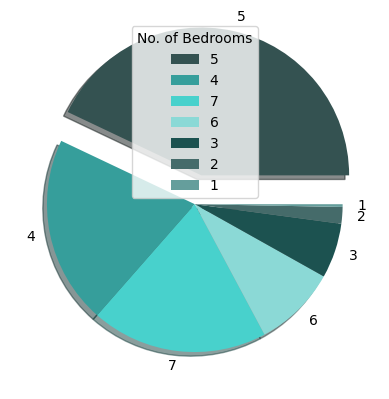

In [12]:
bedroomsvalues = data['bedrooms'].value_counts()
mycolors = ["#345251", "#369E9B", "#48D1CC", "#8BD9D6",'#1C5250', '#456B6A', '#659E9C',]
myexplode = [0.2, 0, 0, 0, 0, 0, 0]
plt.pie(bedroomsvalues.values, labels=bedroomsvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of Bedrooms')
plt.show()

#### Bathrooms

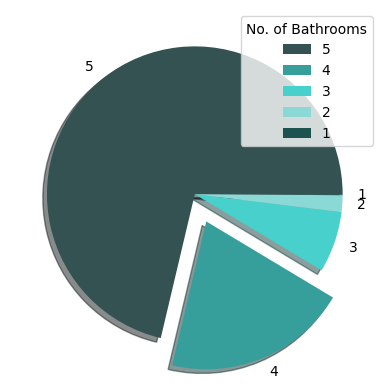

In [13]:
bathvalues = data['bathrooms'].value_counts()
mycolors = ["#345251", "#369E9B", "#48D1CC", "#8BD9D6",'#1C5250']
myexplode = [0, 0.2, 0, 0, 0]
plt.pie(bathvalues.values, labels=bathvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of Bathrooms')
plt.show()

#### Livingrooms

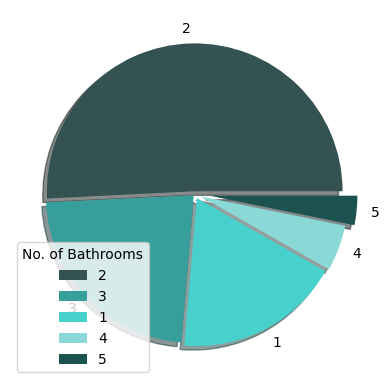

In [14]:
livingvalues = data['livingrooms'].value_counts()
mycolors = ["#345251", "#369E9B", "#48D1CC", "#8BD9D6",'#1C5250']
myexplode = [0.02, 0.01, 0.03, 0.04, 0.1]
plt.pie(livingvalues.values, labels=livingvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of Bathrooms')
plt.show()

#### Kitchen

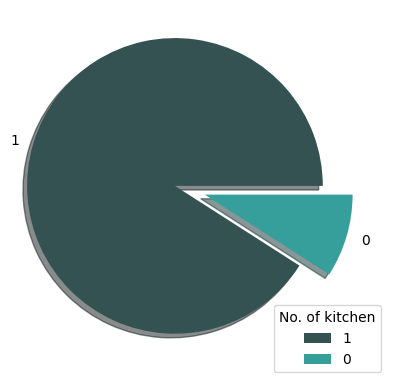

In [15]:
kitchenvalues = data['kitchen'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0.2, 0.01]
plt.pie(kitchenvalues.values, labels=kitchenvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of kitchen')
plt.show()

#### Garage

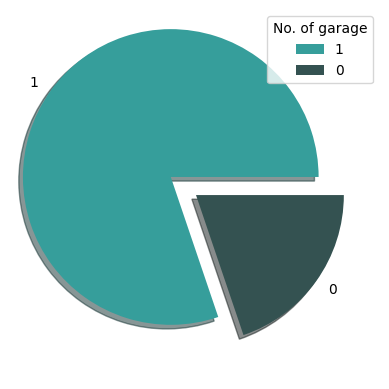

In [16]:
garagevalues = data['garage'].value_counts()
mycolors = ["#369E9B", "#345251"]
myexplode = [0.2, 0.01]
plt.pie(garagevalues.values, labels=garagevalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of garage')
plt.show()

#### Driver Room

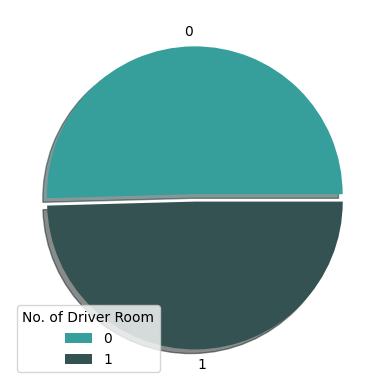

In [17]:
drivervalues = data['driver_room'].value_counts()
mycolors = ["#369E9B", "#345251"]
myexplode = [0, 0.05]
plt.pie(drivervalues.values, labels=drivervalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of Driver Room')
plt.show()

#### Maid Room

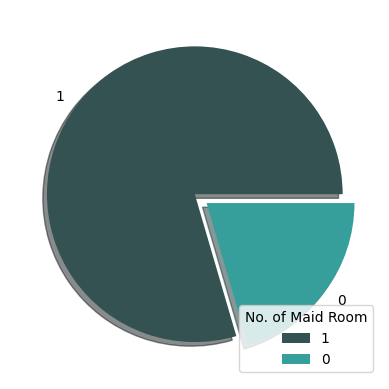

In [18]:
maidvalues = data['maid_room'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0, 0.1]
plt.pie(maidvalues.values, labels=maidvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'No. of Maid Room')
plt.show()

#### Furnished

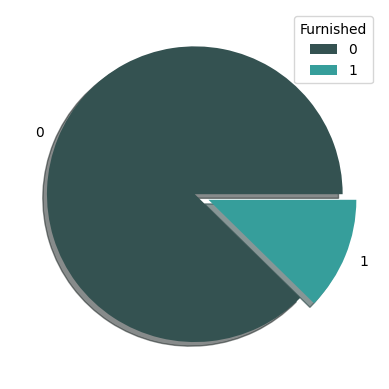

In [19]:
furnishedvalues = data['furnished'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0, 0.1]
plt.pie(furnishedvalues.values, labels=furnishedvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Furnished')
plt.show()

#### AC

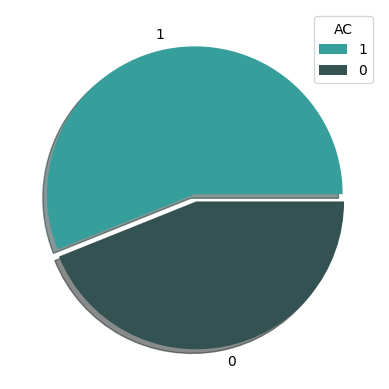

In [20]:
acvalues = data['ac'].value_counts()
mycolors = ["#369E9B", "#345251"]
myexplode = [0, 0.05]
plt.pie(acvalues.values, labels=acvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'AC')
plt.show()

#### Roof 

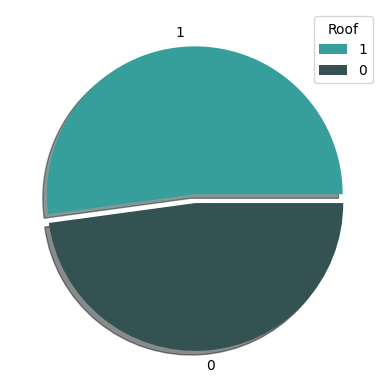

In [21]:
roofvalues = data['roof'].value_counts()
mycolors = ["#369E9B", "#345251"]
myexplode = [0, 0.06]
plt.pie(roofvalues.values, labels=roofvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Roof')
plt.show()

#### Pool

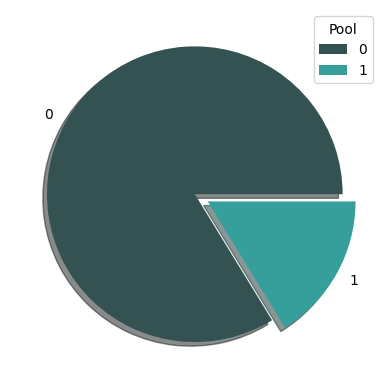

In [22]:
poolvalues = data['pool'].value_counts()
mycolors = [ "#345251", "#369E9B"]
myexplode = [0, 0.1]
plt.pie(poolvalues.values, labels=poolvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Pool')
plt.show()

#### Frontyard

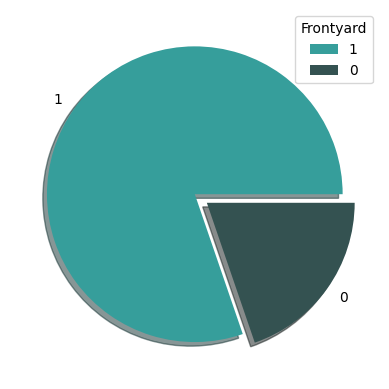

In [23]:
frontyardvalues = data['frontyard'].value_counts()
mycolors = ["#369E9B", "#345251"]
myexplode = [0, 0.1]
plt.pie(frontyardvalues.values, labels=frontyardvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Frontyard')
plt.show()

#### Basement

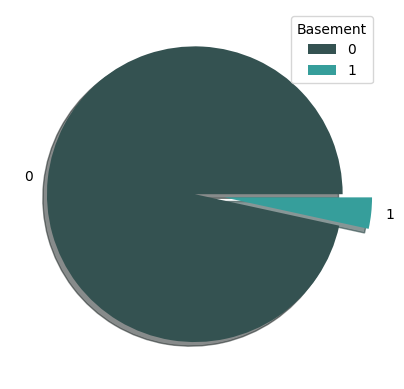

In [24]:
basementvalues = data['basement'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0, 0.2]
plt.pie(basementvalues.values, labels=basementvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Basement')
plt.show()

#### Duplex

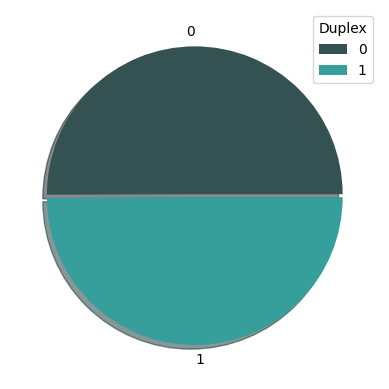

In [25]:
duplexvalues = data['duplex'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0, 0.02]
plt.pie(duplexvalues.values, labels=duplexvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Duplex')
plt.show()

#### Stairs

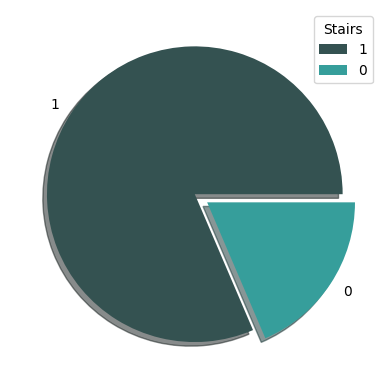

In [26]:
stairsvalues = data['stairs'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0, 0.1]
plt.pie(stairsvalues.values, labels=stairsvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Stairs')
plt.show()

#### Elevator

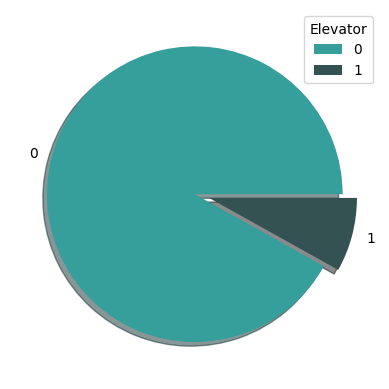

In [27]:
elevatorvalues = data['elevator'].value_counts()
mycolors = ["#369E9B", "#345251"]
myexplode = [0, 0.1]
plt.pie(elevatorvalues.values, labels=elevatorvalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Elevator')
plt.show()

#### Fireplace

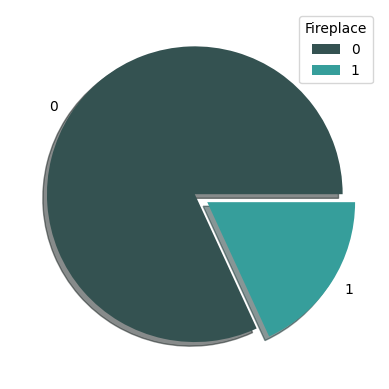

In [28]:
fireplacevalues = data['fireplace'].value_counts()
mycolors = ["#345251", "#369E9B"]
myexplode = [0, 0.1]
plt.pie(fireplacevalues.values, labels=fireplacevalues.index,  colors = mycolors, explode = myexplode, shadow = True)
plt.legend(title = 'Fireplace')
plt.show()

#### Price 

<Axes: xlabel='price'>

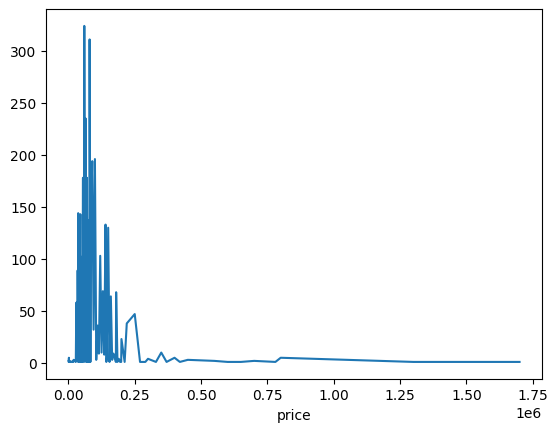

In [29]:
data['price'].value_counts().sort_index().plot.line()

### Correlation Heatmap: Exploring Relationships in the Data

In [30]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

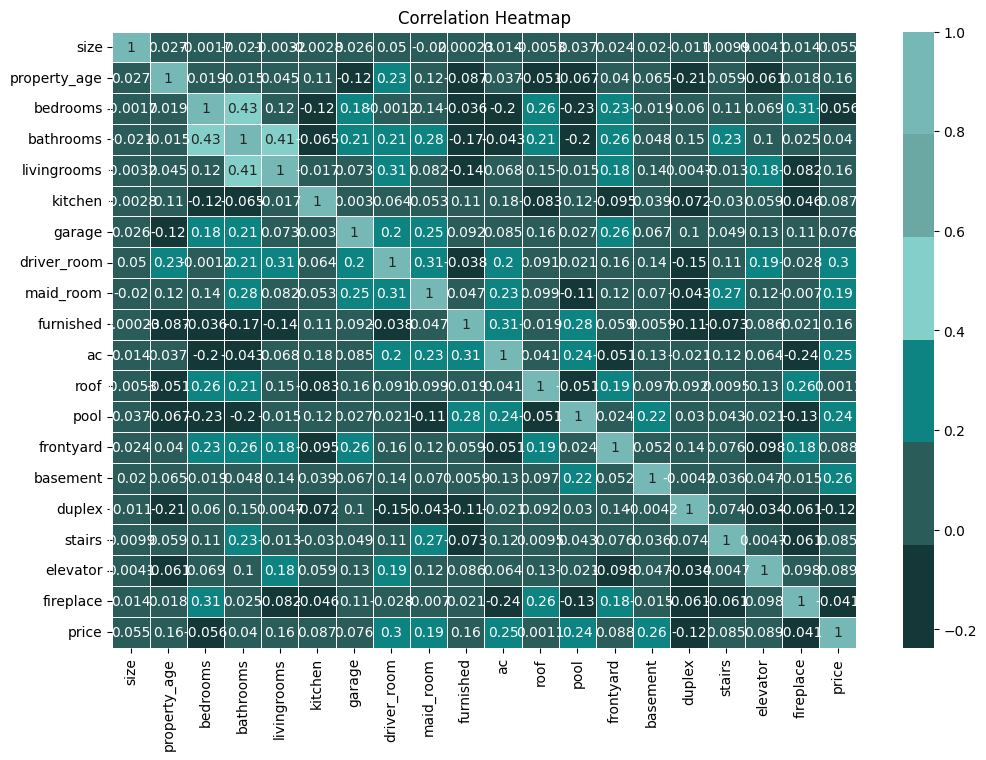

In [31]:

plt.figure(figsize=(12, 8))
custom_palette = [  '#369E9B', '#48D1CC', '#8BD9D6', '#1C5250', '#456B6A', '#659E9C', '#70AEAC', '#246B69', '#4E7A79']
color= ['#133837','#2A5C5A','#0D8482','#84CFCA','#6BA8A4','#76B8B5']
sns.heatmap(correlation_matrix, annot=True, cmap=color, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Unveiling Connections: Bivariate Visual Analysis


#### CITY vs. PRICE

/tmp/ipykernel_50678/1572259483.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_xticks)


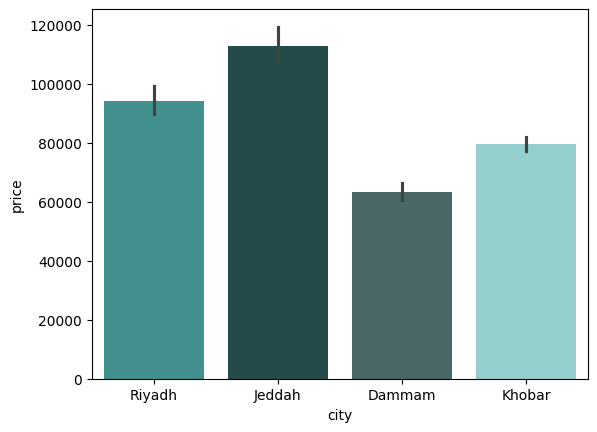

In [32]:
colors = ['#369E9B','#1C5250', '#456B6A','#8BD9D6']
ax = sns.barplot(data=data, x='city', y='price', hue='city', palette=colors, legend=False)
plt.rcParams['font.family'] = 'sans-serif'
custom_xticks =  ["Riyadh", "Jeddah","Dammam", 'Khobar']
ax.set_xticklabels(custom_xticks)
plt.show()

#### FRONT vs. PRICE

/tmp/ipykernel_50678/809299157.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_xticks, rotation=90)


[Text(0, 0, 'North'),
 Text(1, 0, 'South'),
 Text(2, 0, 'West'),
 Text(3, 0, 'East'),
 Text(4, 0, 'South East'),
 Text(5, 0, ' Southwest'),
 Text(6, 0, 'Northwest'),
 Text(7, 0, 'Northeast'),
 Text(8, 0, '3 streets'),
 Text(9, 0, '4 streets')]

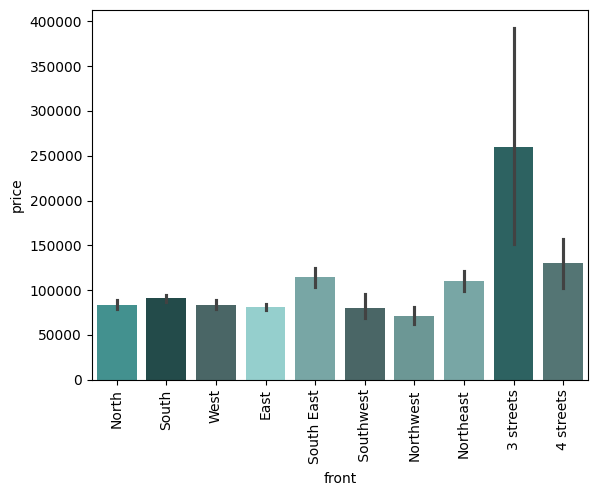

In [33]:
colors = ['#369E9B','#1C5250', '#456B6A','#8BD9D6', '#70AEAC', '#456B6A', '#659E9C', '#70AEAC', '#246B69', '#4E7A79']
ax = sns.barplot(data=data, x='front', y='price', hue='front', palette=colors, legend=False)
custom_xticks = ['North','South', 'West', 'East', 'South East',' Southwest','Northwest',  'Northeast', '3 streets', '4 streets']
ax.set_xticklabels(custom_xticks, rotation=90)



#### SIZE vs. PRICE

(0.0, 4000.0)

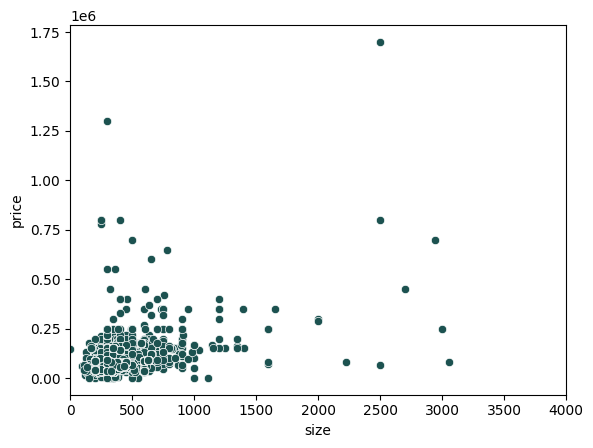

In [34]:
sns.scatterplot(x=data['size'], y=data['price'], marker='o', color='#1C5250')
plt.xlim(0, 4000)

#### PROPERTY-AGE vs. Price

<BarContainer object of 3718 artists>

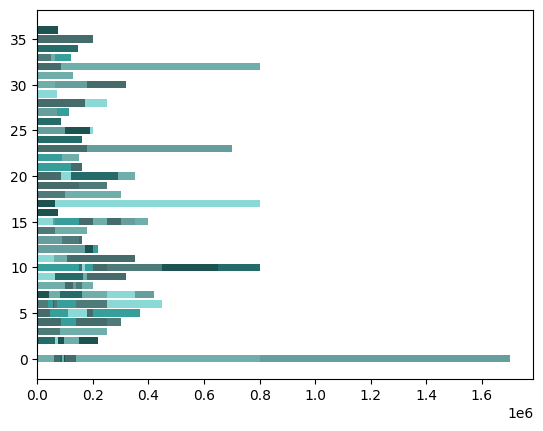

In [35]:
plt.barh(data['property_age'], data['price'], color=colors)

#### BEDROOMS vs. PRICE

<Axes: xlabel='bedrooms', ylabel='price'>

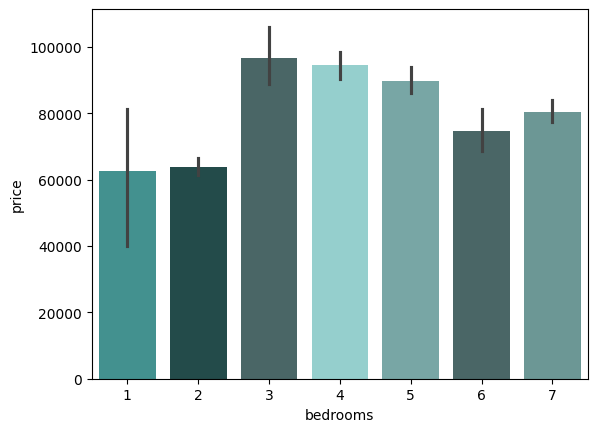

In [36]:
colors = ['#369E9B','#1C5250', '#456B6A','#8BD9D6', '#70AEAC', '#456B6A', '#659E9C']
sns.barplot(data=data, x='bedrooms', y='price', hue='bedrooms', palette=colors, legend=False)

#### BATHROOMS vs. PRICE

<Axes: xlabel='bathrooms', ylabel='price'>

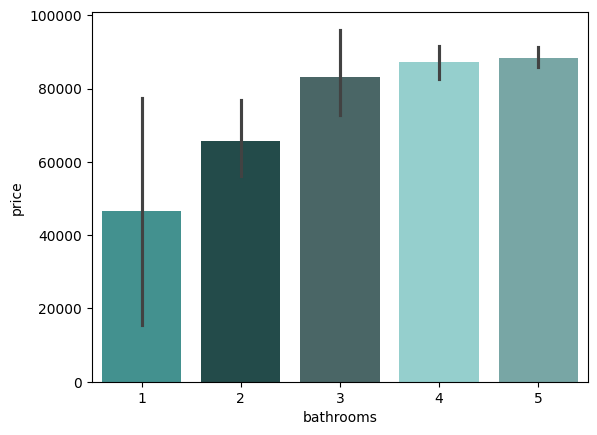

In [37]:
colors = ['#369E9B','#1C5250', '#456B6A','#8BD9D6', '#70AEAC']
sns.barplot(data=data, x='bathrooms', y='price', hue='bathrooms', palette=colors, legend=False)

#### LIVINGROOMS vs. PRICE

<Axes: xlabel='livingrooms', ylabel='price'>

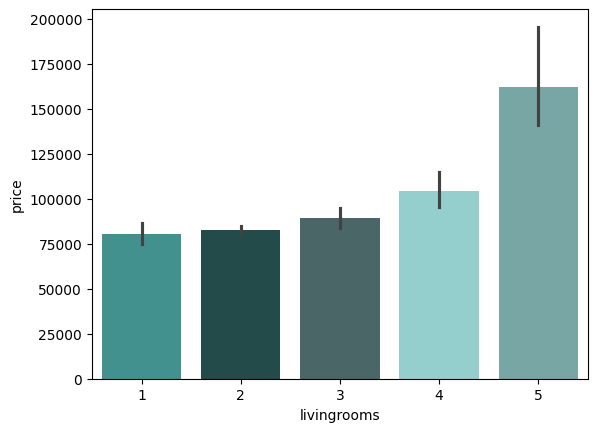

In [38]:
colors = ['#369E9B','#1C5250', '#456B6A','#8BD9D6', '#70AEAC']
sns.barplot(data=data, x='livingrooms', y='price', hue='livingrooms', palette=colors, legend=False)

#### KITCHEN vs. PRICE 

<Axes: xlabel='kitchen', ylabel='price'>

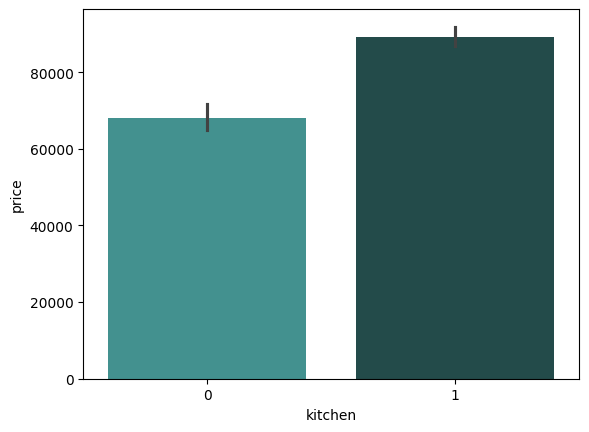

In [39]:
colors = ['#369E9B','#1C5250']
sns.barplot(data=data, x='kitchen', y='price', hue='kitchen', palette=colors, legend=False)

#### GARAGE vs. PRICE

<Axes: xlabel='garage', ylabel='price'>

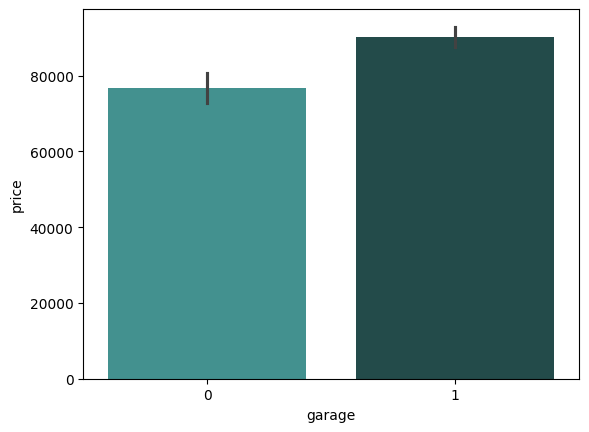

In [40]:
colors = ['#369E9B','#1C5250']
sns.barplot(data=data, x='garage', y='price', hue='garage', palette=colors, legend=False)

#### DRIVER-ROOM vs. PRICE 

<Axes: xlabel='driver_room', ylabel='price'>

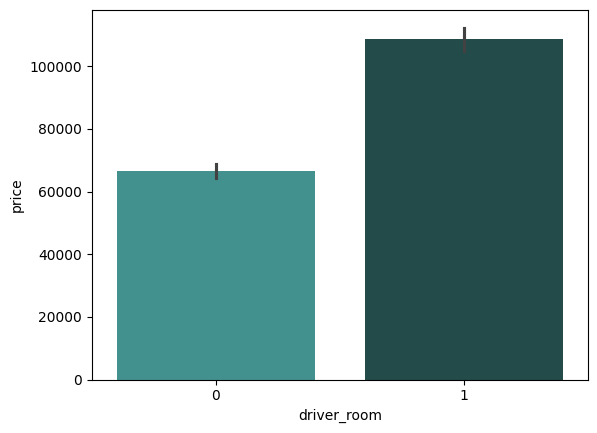

In [41]:
colors = ['#369E9B','#1C5250']
sns.barplot(data=data, x='driver_room', y='price', hue='driver_room', palette=colors, legend=False)

#### MAID-ROOM vs. PRICE

<Axes: xlabel='maid_room', ylabel='price'>

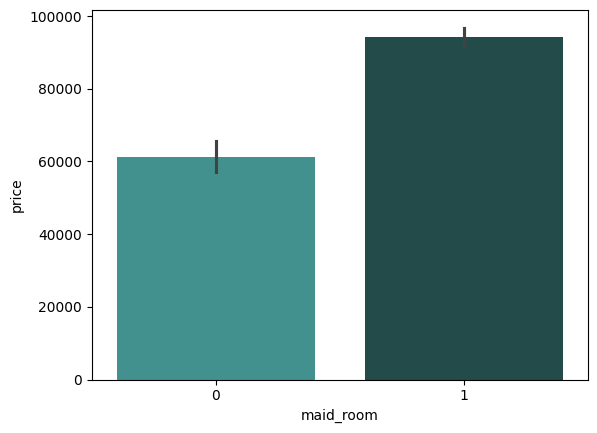

In [42]:
colors = ['#369E9B','#1C5250']
sns.barplot(data=data, x='maid_room', y='price', hue='maid_room', palette=colors, legend=False)

#### FURNISHED vs. PRICE 

<Axes: xlabel='furnished', ylabel='price'>

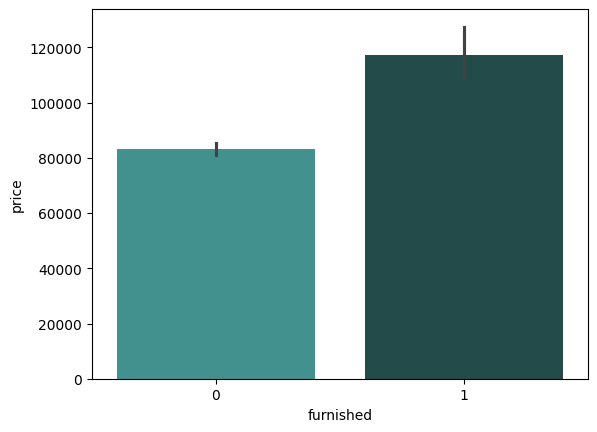

In [43]:
colors = ['#369E9B','#1C5250']
sns.barplot(data=data, x='furnished', y='price', hue='furnished', palette=colors, legend=False)

#### AC vs. PRICE 

<Axes: xlabel='ac', ylabel='price'>

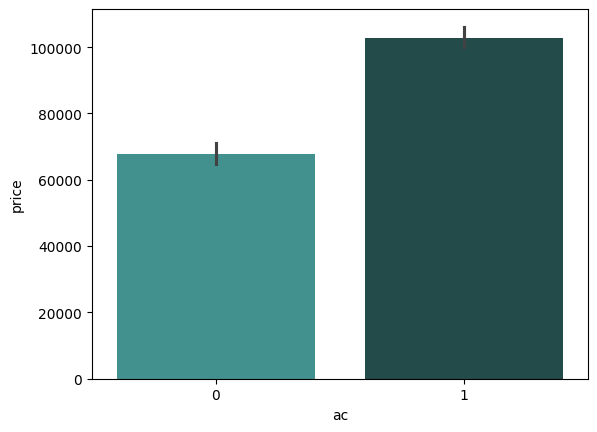

In [44]:
colors = ['#369E9B','#1C5250']
sns.barplot(data=data, x='ac', y='price', hue='ac', palette=colors, legend=False)

#### ROOF vs. PRICE

<Axes: xlabel='roof', ylabel='price'>

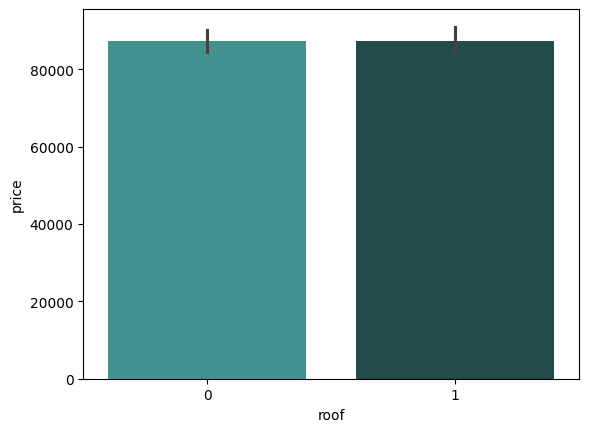

In [45]:
sns.barplot(data=data, x='roof', y='price', hue='roof', palette=colors, legend=False)

#### POOL vs. PRICE

<Axes: xlabel='pool', ylabel='price'>

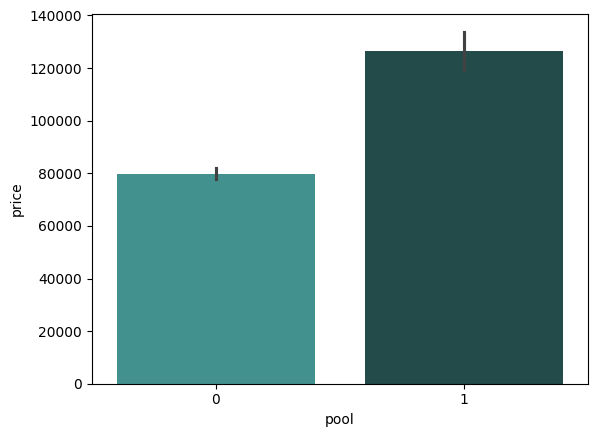

In [46]:
sns.barplot(data=data, x='pool', y='price', hue='pool', palette=colors, legend=False)

#### FRONTYARD vs. PRICE

<Axes: xlabel='frontyard', ylabel='price'>

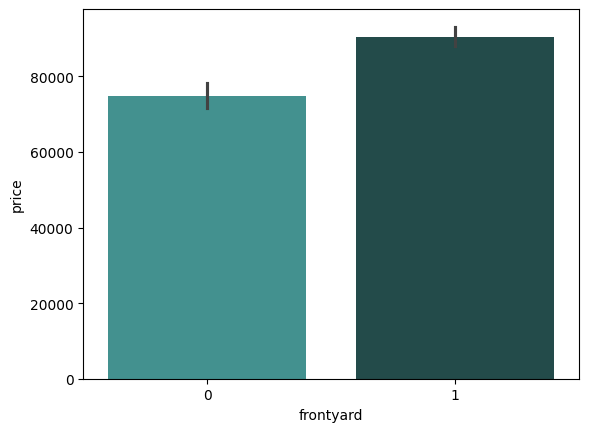

In [47]:
sns.barplot(data=data, x='frontyard', y='price', hue='frontyard', palette=colors, legend=False)

#### BASEMENT vs. PRICE

<Axes: xlabel='basement', ylabel='price'>

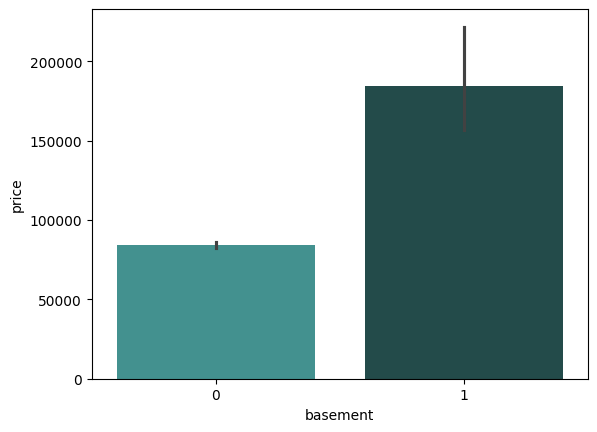

In [48]:
sns.barplot(data=data, x='basement', y='price', hue='basement', palette=colors, legend=False)

#### DUPLEX vs. PRICE

<Axes: xlabel='duplex', ylabel='price'>

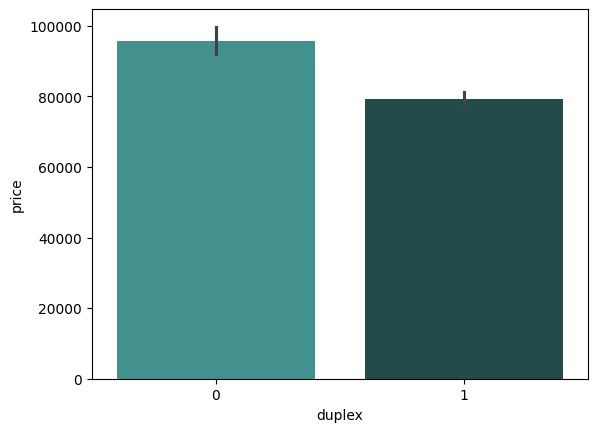

In [49]:
sns.barplot(data=data, x='duplex', y='price', hue='duplex', palette=colors, legend=False)

#### STAIRS vs. PRICE

<Axes: xlabel='stairs', ylabel='price'>

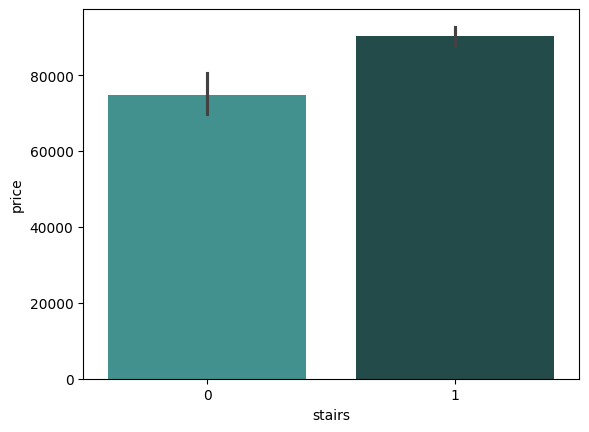

In [50]:
sns.barplot(data=data, x='stairs', y='price', hue='stairs', palette=colors, legend=False)

#### ELEVATOR vs. PRICE

<Axes: xlabel='elevator', ylabel='price'>

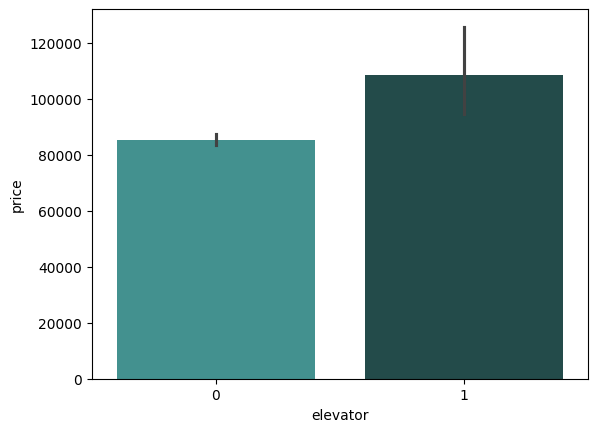

In [51]:
sns.barplot(data=data, x='elevator', y='price', hue='elevator', palette=colors, legend=False)

#### FIREPLACE vs. PRICE

<Axes: xlabel='fireplace', ylabel='price'>

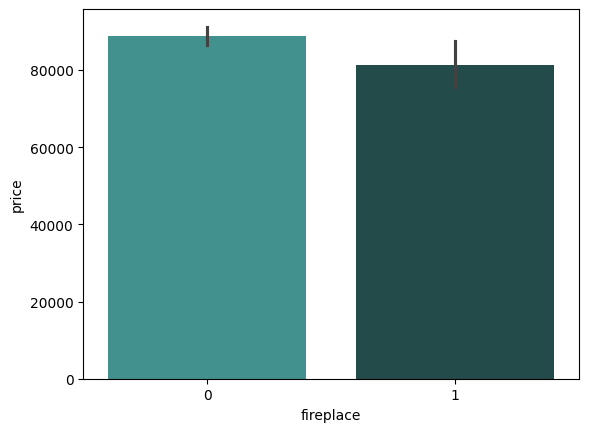

In [52]:
sns.barplot(data=data, x='fireplace', y='price', hue='fireplace', palette=colors, legend=False)

### Outlier Detection

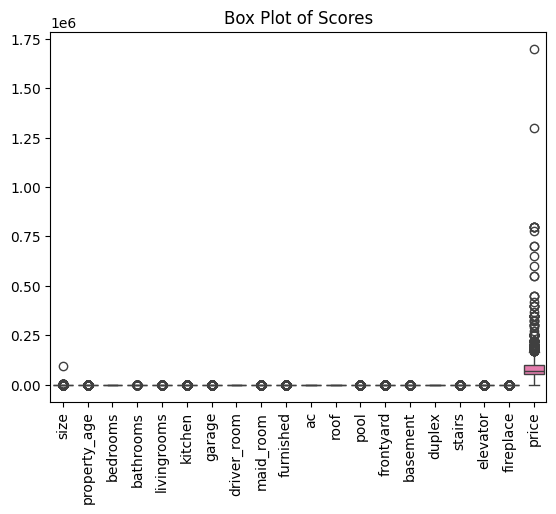

In [53]:
sns.boxplot(data=data).set(title="Box Plot of Scores")
plt.xticks(rotation=90)
plt.show()

### Missing Values Detection

In [54]:
data.isnull().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

## Feature Selection and Encoding

### Label_Encoder

In [55]:
label_encoder = LabelEncoder()

In [56]:
data['city'] = label_encoder.fit_transform(data['city'])
data['district'] = label_encoder.fit_transform(data['district'])
data['front'] = label_encoder.fit_transform(data['front'])

### Unneeded Data Removal

In [57]:
data.drop('details', axis=1, inplace=True)

# Regression Techniques for Predictive Modeling

## Splitting the Data into Features (X) and Target (y)

In [58]:
X = data.drop('price', axis=1)
y = data['price']  # y contains only the 'price' column

## Splitting the Data into Training and Testing Sets

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear-Model Regression

In [60]:
linear_model = LinearRegression()
# Fit the model on the training data
linear_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = linear_model.predict(X_test)
# Evaluate the model using metrics
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: -61.116502137690716


## Generating Polynomial Features for Data

In [61]:
# Create a PolynomialFeatures object to generate polynomial features
poly = PolynomialFeatures(degree=2)  # You can specify the degree of the polynomial
# Transform the independent variable data for training and testing to include polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_test_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: -61.116502137690716


## RandomForest Regression

In [62]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 3501015749.0494924
R-squared (R2) Score: 0.0776851267906482


In [63]:
# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Adjust the number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Adjust the maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Adjust the minimum number of samples required to split an internal node
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model

r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.25500485462058764


## GradientBoosting Regression

In [64]:
param_space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1),
}

In [65]:
def objective(params):
    model = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        random_state=42
    )
    score = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return {'loss': score, 'status': STATUS_OK}

In [66]:
# Use Hyperopt to find the best hyperparameters
trials = Trials()
best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=100, trials=trials)

# Create the final model with the best hyperparameters
best_model = GradientBoostingRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    subsample=best['subsample'],
    random_state=42
)

100%|██████████| 100/100 [14:09<00:00,  8.49s/trial, best loss: 3867525207.8093386]


In [67]:
# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 2780699953.549878
R-squared (R2) Score: 0.26744661865976926


## SVR Regression

In [77]:
# Create and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4093731279.810006
R-squared: -0.07846108584807387


## DecisionTreeRegressor

In [80]:
# Define a grid of hyperparameters to test
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],  # Maximum depth of the decision tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Create a Decision Tree Regression model
tree_model = DecisionTreeRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Create a new Decision Tree Regression model with the best hyperparameters
tree_model_best = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
tree_model_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model_best.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.14553545803852197


## XGBoost Regression

In [83]:
# Define a grid of hyperparameters to test
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Create an XGBoost Regression model
xgb_model = XGBRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_max_depth = grid_search.best_params_['max_depth']
best_learning_rate = grid_search.best_params_['learning_rate']
best_n_estimators = grid_search.best_params_['n_estimators']

# Create a new XGBoost Regression model with the best hyperparameters
xgb_model_best = XGBRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate, n_estimators=best_n_estimators)
xgb_model_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model_best.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Best Max Depth:", best_max_depth)
print("Best Learning Rate:", best_learning_rate)
print("Best N Estimators:", best_n_estimators)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

Best Max Depth: 4
Best Learning Rate: 0.2
Best N Estimators: 50
Mean Squared Error: 3787666986.077802
R-squared: 0.002169128495910999


/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/codespace/.python/current/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

## LightGBM Regression

In [87]:
# Create and train the LightGBM Regression model
lgb_model = lgb.LGBMRegressor(max_depth=3, learning_rate=0.1, n_estimators=100)
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 2974, number of used features: 22
[LightGBM] [Info] Start training from score 87383.047411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [88]:
# Define a grid of hyperparameters to test
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Create a LightGBM Regression model
lgb_model = lgb.LGBMRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the search
best_max_depth = grid_search.best_params_['max_depth']
best_learning_rate = grid_search.best_params_['learning_rate']
best_n_estimators = grid_search.best_params_['n_estimators']

# Create a new LightGBM Regression model with the best hyperparameters
lgb_model_best = lgb.LGBMRegressor(max_depth=best_max_depth, learning_rate=best_learning_rate, n_estimators=best_n_estimators)
lgb_model_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgb_model_best.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Best Max Depth:", best_max_depth)
print("Best Learning Rate:", best_learning_rate)
print("Best N Estimators:", best_n_estimators)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 2379, number of used features: 22
[LightGBM] [Info] Start training from score 86038.328289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

## Catboost Regression

In [90]:
# Create and train the CatBoost Regression model
catboost_model = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE')
catboost_model.fit(X_train, y_train, verbose=0)  # Set verbose=0 to suppress training output

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2202015198.6744037
R-squared: 0.4198965345066382


In [91]:
# Define a grid of hyperparameters to test
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create a CatBoost Regression model
catboost_model = CatBoostRegressor()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train, verbose=0)  # Set verbose=0 to suppress training output

# Get the best hyperparameters from the search
best_iterations = grid_search.best_params_['iterations']
best_depth = grid_search.best_params_['depth']
best_learning_rate = grid_search.best_params_['learning_rate']

# Create a new CatBoost Regression model with the best hyperparameters
catboost_model_best = CatBoostRegressor(iterations=best_iterations, depth=best_depth, learning_rate=best_learning_rate)
catboost_model_best.fit(X_train, y_train, verbose=0)

# Make predictions on the test data
y_pred = catboost_model_best.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Best Iterations:", best_iterations)
print("Best Depth:", best_depth)
print("Best Learning Rate:", best_learning_rate)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Iterations: 200
Best Depth: 8
Best Learning Rate: 0.1
Mean Squared Error: 1744039328.4574933
R-squared: 0.5405466506298608


## Comparison of R-squared Values for Regression Models

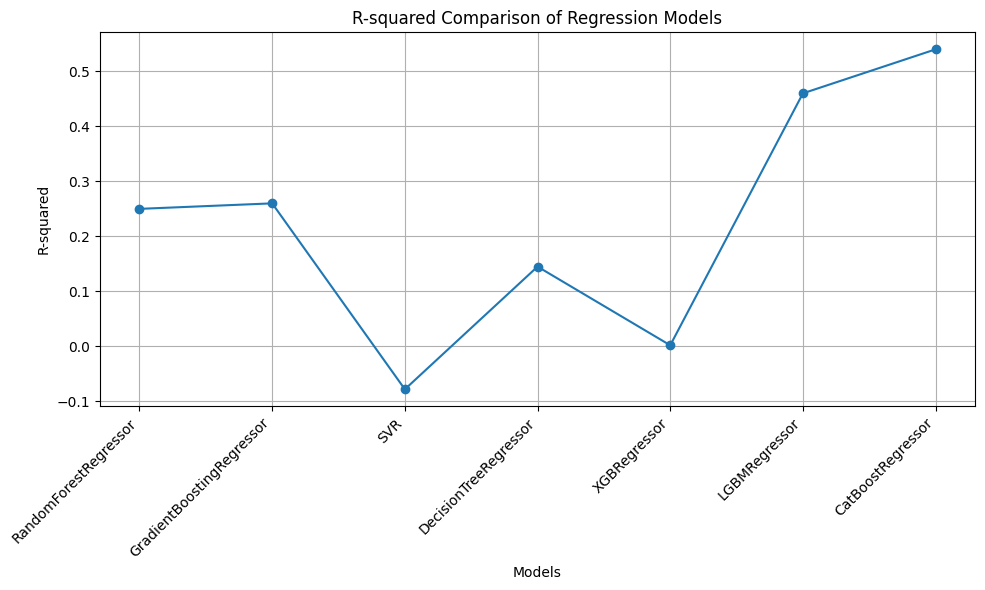

In [100]:
# Define the R-squared values and model names
model_names = [ "RandomForestRegressor", "GradientBoostingRegressor", "SVR", "DecisionTreeRegressor", "XGBRegressor", "LGBMRegressor", "CatBoostRegressor"]
r2_values = [ 0.25, 0.26,  -0.078, 0.145, 0.002, 0.46, 0.540]   

# Create an array for the x-axis (model positions)
x = np.arange(len(model_names))

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(x, r2_values, marker='o', linestyle='-')
plt.xticks(x, model_names, rotation=45, ha="right")
plt.title('R-squared Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('R-squared')

plt.grid(True)
plt.tight_layout()
plt.show()